In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
source('/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/ukbb-tools/04_gwas/check_gwas/plots/gwas_plot_misc.R')


In [3]:
annot_f <- '/scratch/groups/mrivas/ukbb24983/cal/annotation_20201002/ukb24983_cal_cALL_v2_hg19.vep101-loftee.Csq.tsv.gz'

snpnet_betas_f <- '/scratch/groups/mrivas/projects/PRS/private_output/202009_batch/HC.1-400/HC215/2_refit/snpnet.tsv'


In [4]:
fread(annot_f, select=c('#CHROM', 'POS', 'ID', 'Allele', 'Csq', 'Consequence', 'SYMBOL', 'gnomAD_AF', 'LoF')) %>%
rename('CHROM'='#CHROM') %>%
mutate(CHROM=if_else(CHROM == 'XY', 'X', CHROM)) %>%
compute_gwas_plot_df() -> annot_df


In [5]:
snpnet_betas_f %>% fread() %>% select(-CHROM, -POS) %>% left_join(annot_df, by='ID') -> df


In [8]:
df%>%
mutate(
    SYMBOL = if_else(is.na(POScum), ID, SYMBOL),
    Csq    = if_else(is.na(POScum), 'pav', Csq),
    POScum = if_else(is.na(POScum), 1094272075, POScum)
) %>%
replace_na(list(SYMBOL='')) %>%
mutate(repel_label = if_else(rank(-abs(BETA)) <= 40, SYMBOL, '')) %>%
plot_lake() + theme(legend.position = 'bottom') -> p_lake


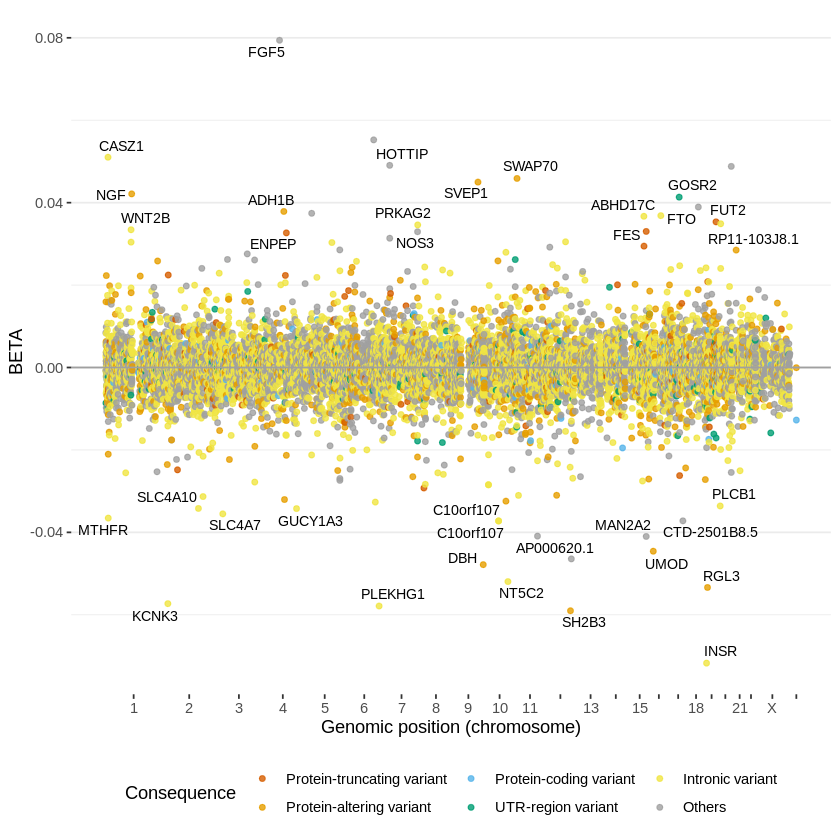

In [9]:
p_lake

In [10]:
ggsave('plots/p_lake.HC215.pdf', p_lake, width=6, height=6)
ggsave('plots/p_lake.HC215.png', p_lake, width=6, height=6)

In [15]:
df %>% filter(is.na(POScum))%>%
head(30)

ID,REF,ALT,BETA,CHROM,POS,Allele,Csq,Consequence,SYMBOL,gnomAD_AF,LoF,POScum
<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
A_201,N,P,-0.004574449,NA,NA,NA,NA,NA,NA,NA,NA,NA
DRB1_401,N,P,0.057464900,NA,NA,NA,NA,NA,NA,NA,NA,NA
DQA1_301,N,P,0.070936530,NA,NA,NA,NA,NA,NA,NA,NA,NA
DPA1_201,N,P,0.019093980,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [8]:
df %>% arrange(POScum) %>%
arrange(-abs(BETA)) %>%
head(30)

ID,REF,ALT,BETA,CHROM,POS,Allele,Csq,Consequence,SYMBOL,gnomAD_AF,LoF,POScum
<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
rs17293632,C,T,0.08678666,15,67442596,T,intron,intron_variant,SMAD3,NA,NA,2373205520
rs61893460,G,A,0.07833492,11,76291154,A,others,regulatory_region_variant,NA,NA,NA,1890886826
rs12123821,C,T,0.07626338,1,152179152,T,intron,intron_variant,"FLG-AS1,RP11-107M16.2",NA,NA,152179152
rs1837253,T,C,0.07476422,5,110401872,C,others,upstream_gene_variant,TSLP,NA,NA,991428655
DQA1_301,N,P,0.07093653,NA,NA,NA,NA,NA,NA,NA,NA,NA
rs12413578,C,T,-0.07005978,10,9049253,T,others,regulatory_region_variant,NA,NA,NA,1688204699
rs11078928,T,C,-0.06929087,17,38064469,C,ptv,splice_acceptor_variant,GSDMB,0.39890,HC,2536394805
rs1106639,G,A,-0.06613650,2,242690675,A,pav,missense_variant,D2HGDH,0.24240,NA,491913202
rs11071559,C,T,-0.06271826,15,61069988,T,intron,intron_variant,RORA,NA,NA,2366832912
